# Financial Application, Part-2

# Advanced Trading Practices

## Forex EUR/USD price forecasting

#### It is a training example of forecasting the EUR/USD Forex next tick prices

#### ONE-DIMENSIONAL Convolutional Neural Network used
#### Tick Data with Dukastcopy Bank (https://www.dukascopy.com/swiss/english/marketwatch/historical/)

#### !! Note, that this notebook is a hands-on tutorial on Keras. Actual prediction of stock anf Forex prices is a really challenging and complex task that requires tremendous efforts, especially at higher frequencies, such as ticks used in the practical

#### The GOAL: According to the dynamics of TICK PRICES and VOLUME Forex EUR/USD to forecast the price of the next tick
#### We use a substantially refined and ALREADY normalised *.csv file based on raw data from the Dukastcopy repository.

#### Price, volume, and time intervals between ticks have been normalised previously because this process requires a high computer processing time.
#### Price normalisation principals: subtract the minimum and divide by the maximum price among 50 ticks that include this tick. 
#### Normalisation of volumes: based on a maximum of 10 lots (the main number of lots). The volume of more than 10  lots is equated to 10 lots (those to 1 after normalisation).
##### We normalised intervals between ticks: based on a maximum of 20,000 milliseconds (20 seconds) (the main number of intervals). The interval of over 20 seconds is equated to 20 seconds (those to 1 after normalisation).


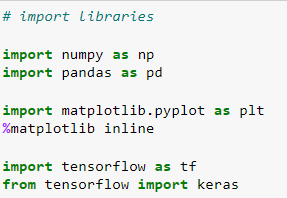

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

3

In [3]:
print(tf.__version__)

2.15.0


2.11.0


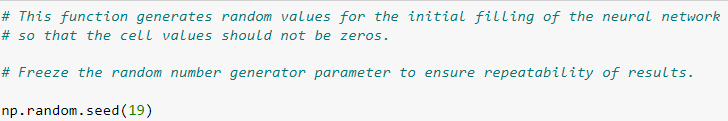

In [4]:
np.random.seed(19)

### Data 
#### We use a substantially refined and ALREADY normalised *.csv file based on raw data from the Dukastcopy repository.

5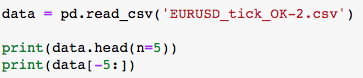

In [5]:
data = pd.read_csv('EURUSD_tick_OK-2.csv')

print(data.head(n=5))
print(data[-5:])

   Vol_Ask_N  Ask_N_200_3  DateDelta1_N  Bid_N_200_3  Vol_Bid_N
0      0.176     0.636364       0.01655     0.515152      0.100
1      0.364     0.606061       0.02750     0.454545      0.420
2      0.100     0.575758       0.09770     0.454545      0.187
3      0.100     0.151515       0.01590     0.121212      0.100
4      0.270     0.212121       0.01040     0.060606      0.214
         Vol_Ask_N  Ask_N_200_3  DateDelta1_N  Bid_N_200_3  Vol_Bid_N
1099995      0.100     0.705357       0.01060     0.687500      0.195
1099996      0.100     0.758929       0.01630     0.741071      0.244
1099997      0.100     0.776786       0.00260     0.750000      0.382
1099998      0.461     0.794643       0.01045     0.758929      0.393
1099999      0.536     0.794643       0.00260     0.758929      0.664


   Vol_Ask_N  Ask_N_200_3  DateDelta1_N  Bid_N_200_3  Vol_Bid_N
0      0.176     0.636364       0.01655     0.515152      0.100
1      0.364     0.606061       0.02750     0.454545      0.420
2      0.100     0.575758       0.09770     0.454545      0.187
3      0.100     0.151515       0.01590     0.121212      0.100
4      0.270     0.212121       0.01040     0.060606      0.214
         Vol_Ask_N  Ask_N_200_3  DateDelta1_N  Bid_N_200_3  Vol_Bid_N
1099995      0.100     0.705357       0.01060     0.687500      0.195
1099996      0.100     0.758929       0.01630     0.741071      0.244
1099997      0.100     0.776786       0.00260     0.750000      0.382
1099998      0.461     0.794643       0.01045     0.758929      0.393
1099999      0.536     0.794643       0.00260     0.758929      0.664


6

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Vol_Ask_N     1100000 non-null  float64
 1   Ask_N_200_3   1100000 non-null  float64
 2   DateDelta1_N  1100000 non-null  float64
 3   Bid_N_200_3   1100000 non-null  float64
 4   Vol_Bid_N     1100000 non-null  float64
dtypes: float64(5)
memory usage: 42.0 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Vol_Ask_N     1100000 non-null  float64
 1   Ask_N_200_3   1100000 non-null  float64
 2   DateDelta1_N  1100000 non-null  float64
 3   Bid_N_200_3   1100000 non-null  float64
 4   Vol_Bid_N     1100000 non-null  float64
dtypes: float64(5)
memory usage: 42.0 MB


In [1]:
# This dataset has already been normalised inside 50 tick windows and prepared for training.
# The data consists of normalised Ask prices (offer) and Bid (demand) and 
# the corresponding Volumes of transactions at Ask and Bid prices.
# A sequence of time intervals between adjacent ticks has been added as a parameter, 
# which contains critical information about the behaviour of market participants such as buyers and sellers.

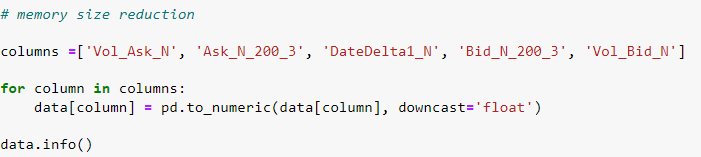

In [7]:
columns = ['Vol_Ask_N', 'Ask_N_200_3', 'DateDelta1_N', 'Bid_N_200_3', 'Vol_Bid_N']

for column in columns:
    data[column] = pd.to_numeric(data[column], downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Vol_Ask_N     1100000 non-null  float32
 1   Ask_N_200_3   1100000 non-null  float32
 2   DateDelta1_N  1100000 non-null  float32
 3   Bid_N_200_3   1100000 non-null  float32
 4   Vol_Bid_N     1100000 non-null  float32
dtypes: float32(5)
memory usage: 21.0 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Vol_Ask_N     1100000 non-null  float32
 1   Ask_N_200_3   1100000 non-null  float32
 2   DateDelta1_N  1100000 non-null  float32
 3   Bid_N_200_3   1100000 non-null  float32
 4   Vol_Bid_N     1100000 non-null  float32
dtypes: float32(5)
memory usage: 21.0 MB


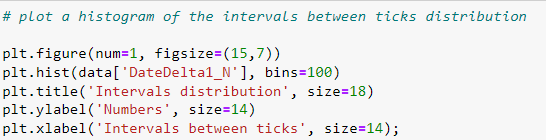

Text(0.5, 0, 'Intervals between ticks')

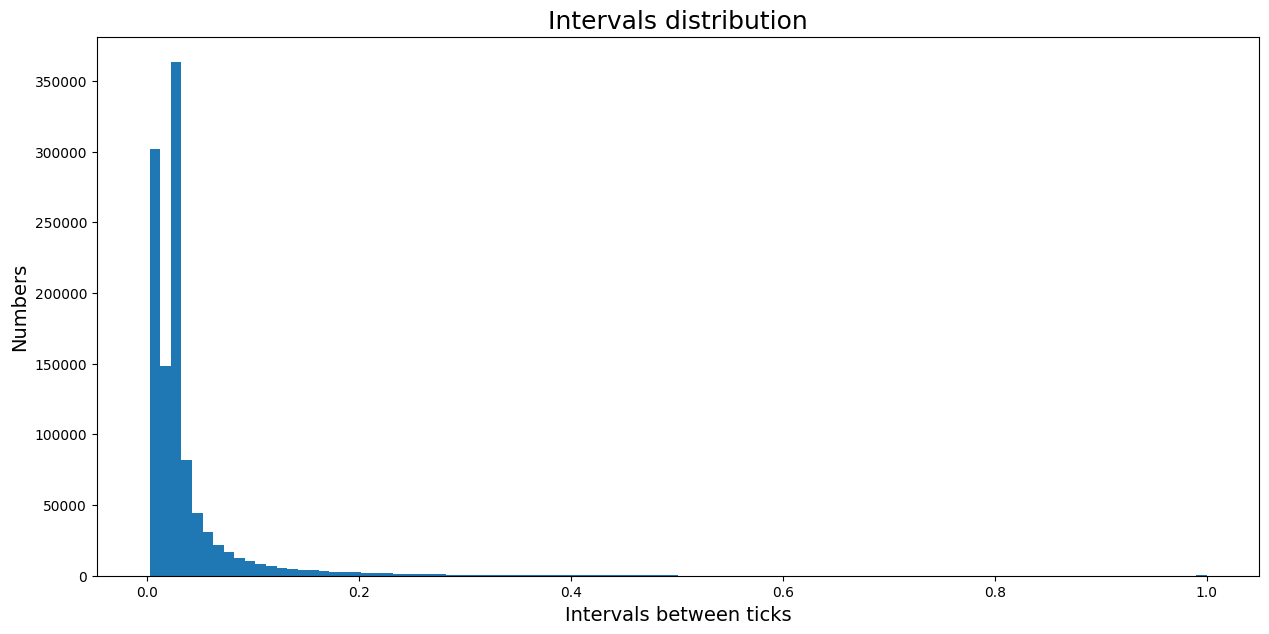

In [8]:
plt.figure(num=1, figsize=(15,7))
plt.hist(data['DateDelta1_N'], bins=100)
plt.title('Intervals distribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('Intervals between ticks', size=14)

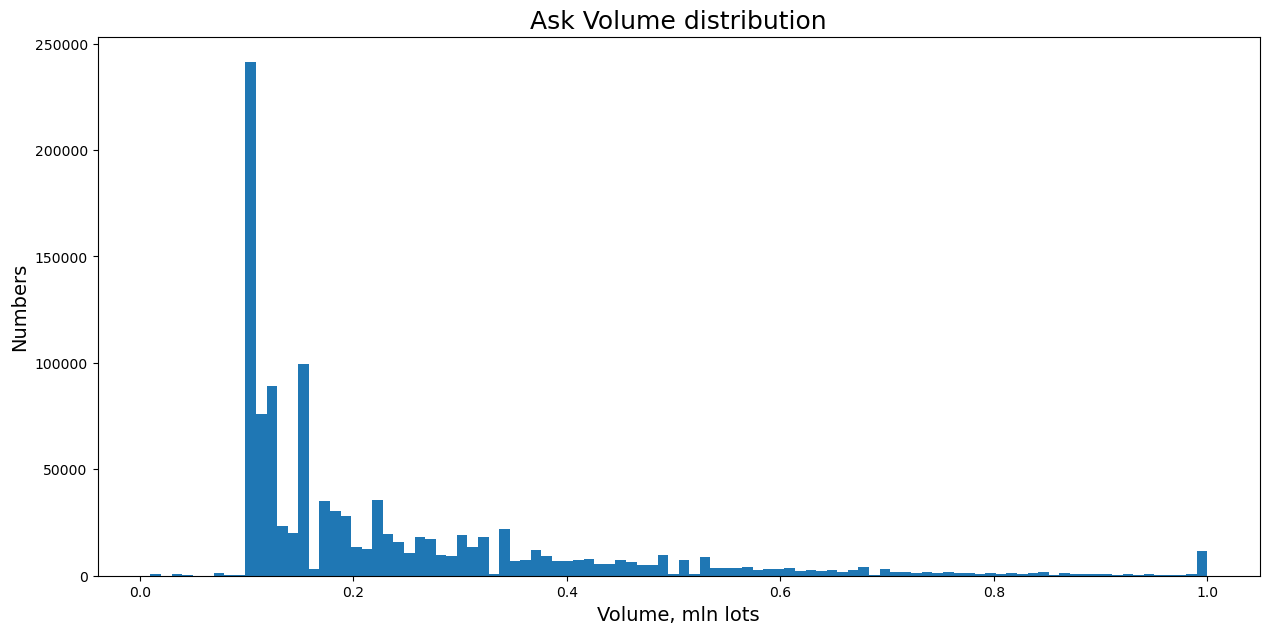

In [15]:
# Explain the above distribution by writing a couple of sentences.

In [ ]:
    # plt.figure(num=1, figsize=(15,7)): This line creates a new figure for plotting. num=1 specifies the figure number, and figsize=(15,7) sets the size of the figure to be 15 inches in width and 7 inches in height.

    # plt.hist(data['DateDelta1_N'], bins=100): This line creates a histogram plot using the data from the column 'DateDelta1_N' of the DataFrame data. It bins the data into 100 intervals and plots the frequency of occurrences for each interval.

    # plt.title('Intervals distribution', size=18): This line sets the title of the plot to 'Intervals distribution' with a font size of 18.

    # plt.ylabel('Numbers', size=14): This line sets the label for the y-axis to 'Numbers' with a font size of 14.

    # plt.xlabel('Intervals between ticks', size=14): This line sets the label for the x-axis to 'Intervals between ticks' with a font size of 14.

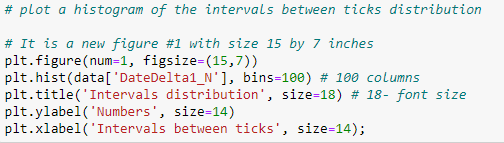

Text(0.5, 0, 'Intervals between ticks')

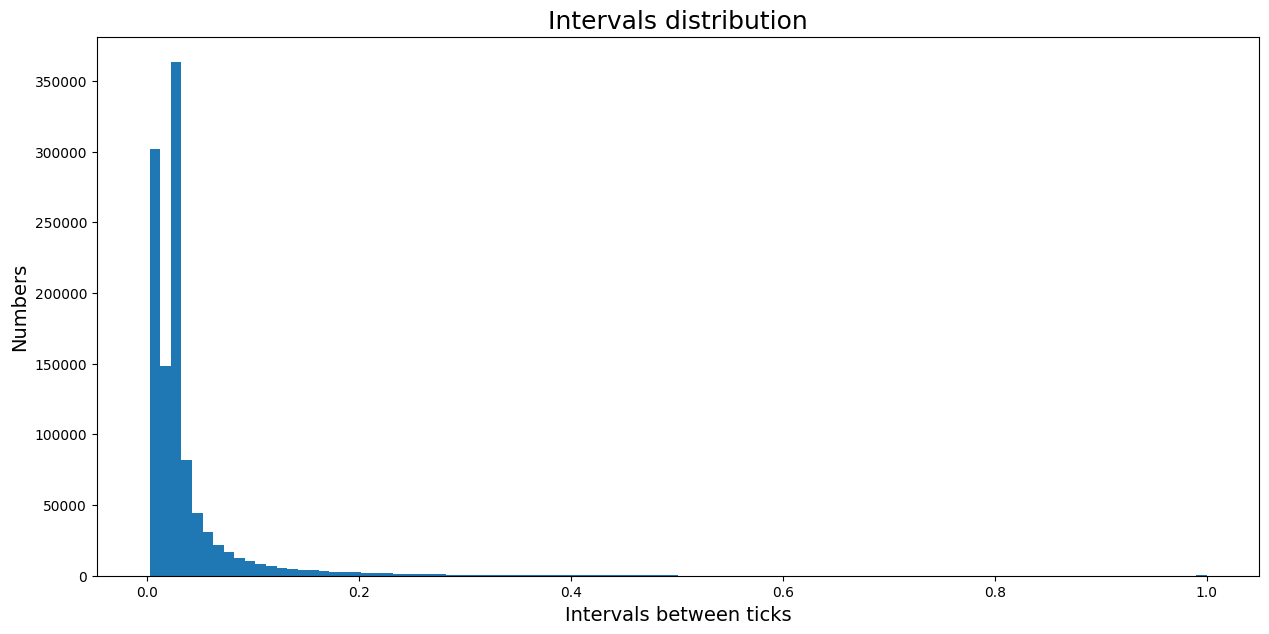

In [9]:
plt.figure(num=1, figsize=(15,7))
plt.hist(data['DateDelta1_N'], bins=100)
plt.title('Intervals distribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('Intervals between ticks', size=14)

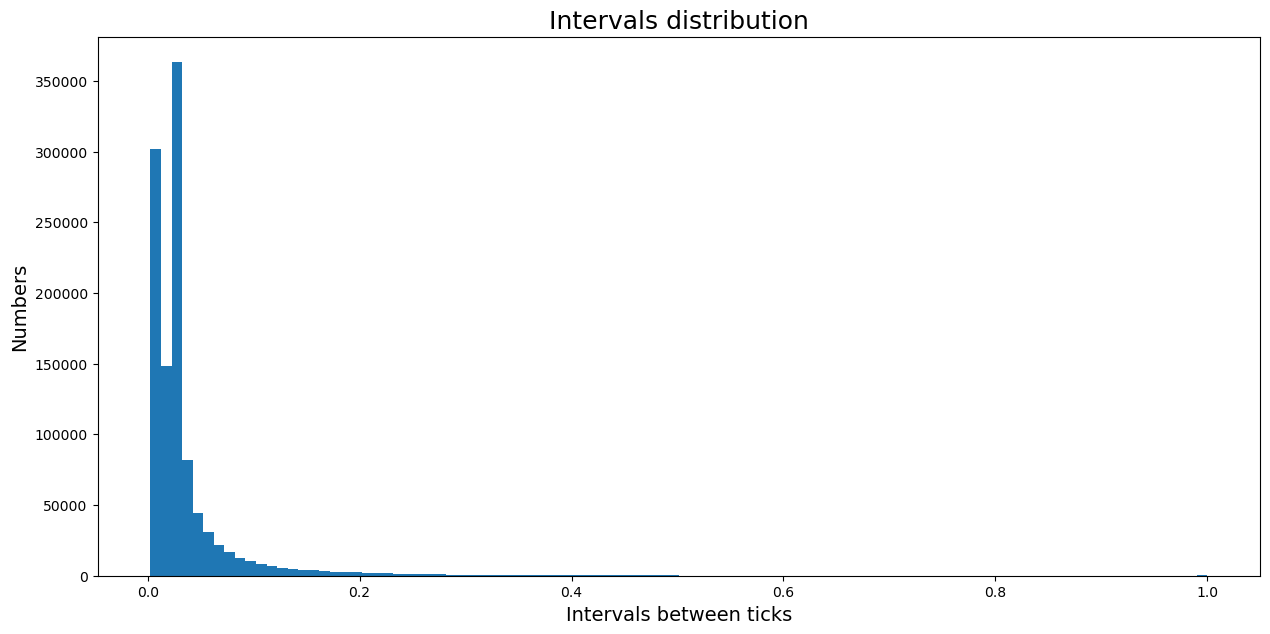

In [12]:
# Explain the above distribution by writing a couple of sentences.

##### Create numpy 

In [16]:
# We will analyze only part of the dataset since training the neural network with 
# an entire dataset would require massive computer power

# n_small = 250000 ticks, which is equals around 1 week.

# We will create a three-dimensional data tensor: [(n_small-N + 1), N, 5] and 
# a two-dimensional array of answers [(n_small-N + 1), N] with a tick price-shifted one tick up.

# N=50 is the number of ticks for analysis at each step; those are looking backwards from the current moment

# Then, you must delete the last sliced square subarray (50*5) since there is no price for the subsequent tick.

# Summary: the intermediate aim is to create
# 1. three-dimensional data tensor of sliced square subarrays [(n_small - N + 1 - 1), N, 5] and
# 2. two-dimensional array of answers Y[(n_small - N + 1 - 1), N] with a tick price shifted one tick up.

10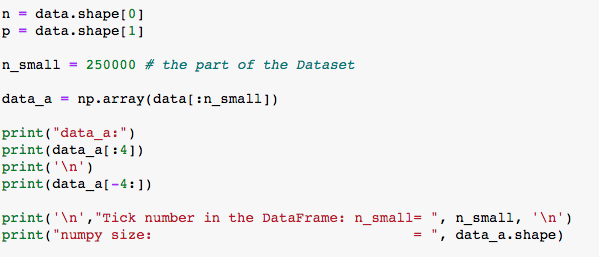

In [10]:
n = data.shape[0]
p = data.shape[1]

n_small = 250000

data_a = np.array(data[:n_small])

print("data_a")
print(data_a[:4])
print('\n')
print(data_a[-4:])

print('\n', "Tick numbers in the DataFrame: n_small=", n_small, '\n')
print("numpy size:                         = ", data_a.shape)

data_a
[[0.176      0.6363636  0.01655    0.5151515  0.1       ]
 [0.364      0.6060606  0.0275     0.45454547 0.42      ]
 [0.1        0.57575756 0.0977     0.45454547 0.187     ]
 [0.1        0.15151516 0.0159     0.12121212 0.1       ]]


[[0.45       0.53424656 0.01085    0.46575344 0.345     ]
 [0.1        0.5068493  0.028      0.46575344 0.195     ]
 [0.1        0.5068493  0.0377     0.47945204 0.1       ]
 [0.1        0.5068493  0.03505    0.46575344 0.12      ]]

 Tick numbers in the DataFrame: n_small= 250000 

numpy size:                         =  (250000, 5)


data_a:
[[0.176      0.6363636  0.01655    0.5151515  0.1       ]
 [0.364      0.6060606  0.0275     0.45454547 0.42      ]
 [0.1        0.57575756 0.0977     0.45454547 0.187     ]
 [0.1        0.15151516 0.0159     0.12121212 0.1       ]]


[[0.45       0.53424656 0.01085    0.46575344 0.345     ]
 [0.1        0.5068493  0.028      0.46575344 0.195     ]
 [0.1        0.5068493  0.0377     0.47945204 0.1       ]
 [0.1        0.5068493  0.03505    0.46575344 0.12      ]]

 Tick number in the DataFrame: n_small=  250000 

numpy size:                               =  (250000, 5)


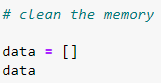

In [11]:
data = list()
data

[]

[]

##### Final aim: predicting the Bid and Ask prices of the next tick in FOREX EURUSD. 

12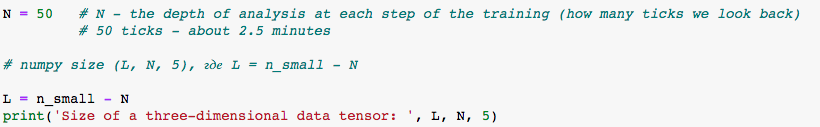

In [12]:
N = 50
L = n_small - N
print('Size of a three-dimensional data tensor: ', L, N, 5)

Size of a three-dimensional data tensor:  249950 50 5


Size of a three-dimensional data tensor:  249950 50 5


In [13]:
# create zero tensors with 'float32' for reducing calculations
data_b = np.zeros( (L, N, 5), dtype='float32')

Y = np.zeros((L,2), dtype='float32')

13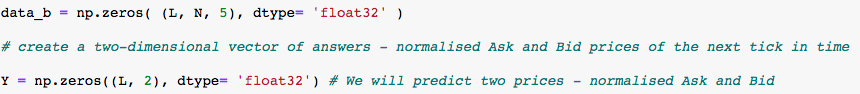

In [14]:
data_b

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0.,

In [15]:
Y

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

14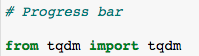

In [16]:
#!pip install tqdm
from tqdm import tqdm

15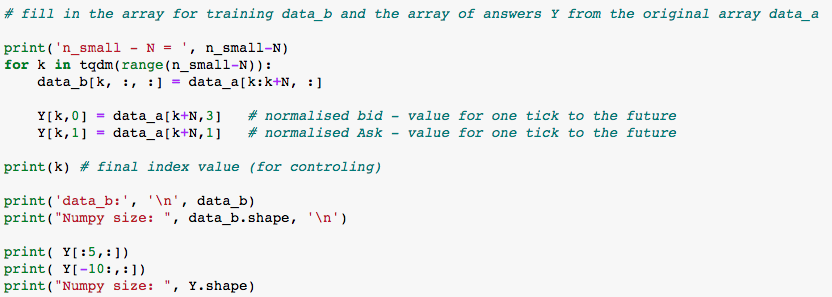

In [17]:
print('n_small - N = ', n_small-N)
for k in tqdm(range(n_small-N)):
    data_b[k, :, :] = data_a[k:k+N, :]

    Y[k,0] = data_a[k+N, 3]
    Y[k,1] = data_a[k+N, 1]

print(k)

print('data_b:', '\n', data_b)
print('Numpy size: ', data_b.shape, '\n')

print(Y[:5, :])
print(Y[-10:,:])
print(f'Numpy size: ', Y.shape)

n_small - N =  249950


100%|██████████| 249950/249950 [00:00<00:00, 472560.41it/s]

249949
data_b: 
 [[[0.176      0.6363636  0.01655    0.5151515  0.1       ]
  [0.364      0.6060606  0.0275     0.45454547 0.42      ]
  [0.1        0.57575756 0.0977     0.45454547 0.187     ]
  ...
  [0.232      0.45454547 0.2092     0.36363637 0.11      ]
  [0.1        0.42424244 0.2085     0.36363637 0.12      ]
  [0.102      0.45454547 0.0284     0.36363637 0.232     ]]

 [[0.364      0.6060606  0.0275     0.45454547 0.42      ]
  [0.1        0.57575756 0.0977     0.45454547 0.187     ]
  [0.1        0.15151516 0.0159     0.12121212 0.1       ]
  ...
  [0.1        0.42424244 0.2085     0.36363637 0.12      ]
  [0.102      0.45454547 0.0284     0.36363637 0.232     ]
  [0.125      0.45454547 0.2103     0.3939394  0.11      ]]

 [[0.1        0.57575756 0.0977     0.45454547 0.187     ]
  [0.1        0.15151516 0.0159     0.12121212 0.1       ]
  [0.27       0.21212122 0.0104     0.06060606 0.214     ]
  ...
  [0.102      0.45454547 0.0284     0.36363637 0.232     ]
  [0.125      0.4

n_small - N =  249950


100%|██████████| 249950/249950 [00:00<00:00, 467580.01it/s]

249949
data_b: 
 [[[0.176      0.6363636  0.01655    0.5151515  0.1       ]
  [0.364      0.6060606  0.0275     0.45454547 0.42      ]
  [0.1        0.57575756 0.0977     0.45454547 0.187     ]
  ...
  [0.232      0.45454547 0.2092     0.36363637 0.11      ]
  [0.1        0.42424244 0.2085     0.36363637 0.12      ]
  [0.102      0.45454547 0.0284     0.36363637 0.232     ]]

 [[0.364      0.6060606  0.0275     0.45454547 0.42      ]
  [0.1        0.57575756 0.0977     0.45454547 0.187     ]
  [0.1        0.15151516 0.0159     0.12121212 0.1       ]
  ...
  [0.1        0.42424244 0.2085     0.36363637 0.12      ]
  [0.102      0.45454547 0.0284     0.36363637 0.232     ]
  [0.125      0.45454547 0.2103     0.3939394  0.11      ]]

 [[0.1        0.57575756 0.0977     0.45454547 0.187     ]
  [0.1        0.15151516 0.0159     0.12121212 0.1       ]
  [0.27       0.21212122 0.0104     0.06060606 0.214     ]
  ...
  [0.102      0.45454547 0.0284     0.36363637 0.232     ]
  [0.125      0.4

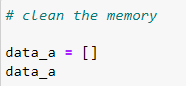

In [18]:
data_a = []
data_a

[]

[]

17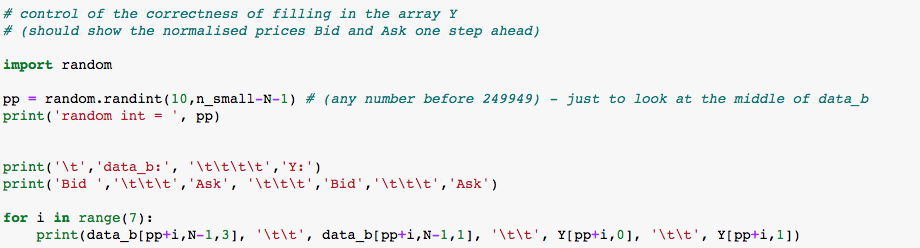

In [19]:
# Just run the cell !

import random

pp = random.randint(10, n_small-N-1) # (any number before 249949) - just to look at the middle of data_b
print('random int = ', pp)

print('\t','data_b:', '\t\t\\t\t\t','Y:')
print('Bid ','\t\t\t','Ask', '\t\t\t','Bid','\t\t\t','Ask')

for i in range(7):
    print(data_b[pp+i,N-1,3], '\t\t', data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0], '\t\t', Y[pp+i,1])

random int =  150031
	 data_b: 		\t		 Y:
Bid  			 Ask 			 Bid 			 Ask
0.23809524 		 0.30952382 		 0.26190478 		 0.33333334
0.26190478 		 0.33333334 		 0.2857143 		 0.35714287
0.2857143 		 0.35714287 		 0.26190478 		 0.30952382
0.26190478 		 0.30952382 		 0.21428572 		 0.2857143
0.21428572 		 0.2857143 		 0.26190478 		 0.35714287
0.26190478 		 0.35714287 		 0.2857143 		 0.35714287
0.2857143 		 0.35714287 		 0.2857143 		 0.33333334


random int =  236942
	 data_b: 			 Y:
Bid  		 Ask 		 Bid 		 Ask
0.81632656 		 0.877551 		 0.8367347 		 0.8979592
0.8367347 		 0.8979592 		 0.81632656 		 0.85714287
0.81632656 		 0.85714287 		 0.7755102 		 0.81632656
0.7755102 		 0.81632656 		 0.75510204 		 0.81632656
0.75510204 		 0.81632656 		 0.7755102 		 0.81632656
0.7755102 		 0.81632656 		 0.75510204 		 0.81632656
0.75510204 		 0.81632656 		 0.75510204 		 0.81632656


In [27]:
# Each rows of Y above must have prices of one tick to future
# You can run the cell amove several times to check

18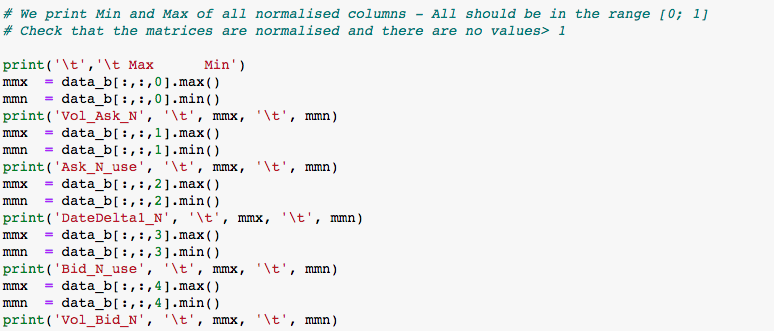

In [20]:
# Just run the cell !

print('\t','\t Max      Min')
mmx  = data_b[:,:,0].max()
mmn  = data_b[:,:,0].min()
print('Vol_Ask_N', '\t', mmx, '\t', mmn)
mmx  = data_b[:,:,1].max()
mmn  = data_b[:,:,1].min()
print('Ask_N_use', '\t', mmx, '\t', mmn)
mmx  = data_b[:,:,2].max()
mmn  = data_b[:,:,2].min()
print('DateDelta1_N', '\t', mmx, '\t', mmn)
mmx  = data_b[:,:,3].max()
mmn  = data_b[:,:,3].min()
print('Bid_N_use', '\t', mmx, '\t', mmn)
mmx  = data_b[:,:,4].max()
mmn  = data_b[:,:,4].min()
print('Vol_Bid_N', '\t', mmx, '\t', mmn)

	 	 Max      Min
Vol_Ask_N 	 1.0 	 0.01
Ask_N_use 	 1.0 	 0.004484305
DateDelta1_N 	 1.0 	 0.0025
Bid_N_use 	 0.995283 	 0.0
Vol_Bid_N 	 1.0 	 0.01


	 	 Max      Min
Vol_Ask_N 	 1.0 	 0.01
Ask_N_use 	 1.0 	 0.004484305
DateDelta1_N 	 1.0 	 0.0025
Bid_N_use 	 0.995283 	 0.0
Vol_Bid_N 	 1.0 	 0.01


### Datasets for training and testing

19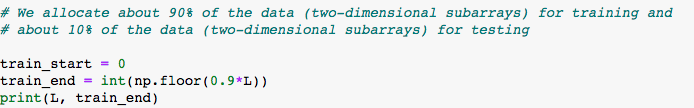

In [21]:
train_start = 0
train_end = int(np.floor(0.9 * L))
print(L, train_end)

249950 224955


249950 224955


20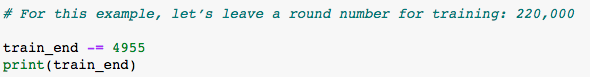

In [22]:
train_end -= 4955
print(train_end)

220000


220000


21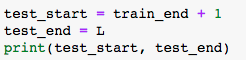

In [23]:
test_start = train_end + 1
test_end = L
print(test_start, test_end)

220001 249950


220001 249950


22

In [24]:
print(test_end - train_end)

29950


29950


23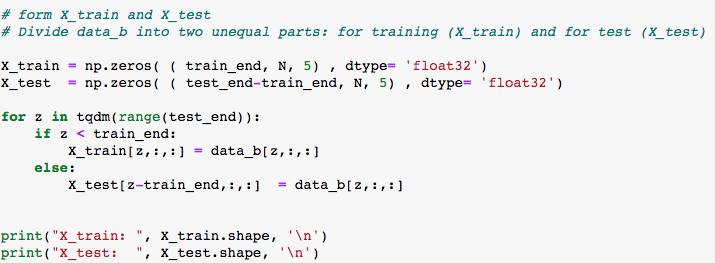

In [25]:
X_train = np.zeros((train_end, N, 5), dtype='float32') 
X_test = np.zeros((test_end - train_end, N, 5), dtype='float32')

for z in tqdm(range(test_end)):
    if z < train_end:
        X_train[z,:,:] = data_b[z,:,:]
    else:
        X_test[z-train_end,:,:] = data_b[z,:,:]

print(f'X_train: ', X_train.shape, '\n')
print(f'X_test: ', X_test.shape, '\n')

100%|██████████| 249950/249950 [00:00<00:00, 852939.16it/s]

X_train:  (220000, 50, 5) 

X_test:  (29950, 50, 5) 



24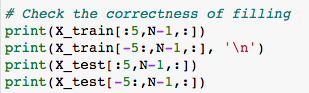

In [26]:
# Just run the cell !

# Check the correctness of filling

print(X_train[:5,N-1,:])
print(X_train[-5:,N-1,:], '\n')
print(X_test[:5,N-1,:])
print(X_test[-5:,N-1,:])

[[0.102      0.45454547 0.0284     0.36363637 0.232     ]
 [0.125      0.45454547 0.2103     0.3939394  0.11      ]
 [0.1        0.45454547 0.02625    0.3939394  0.382     ]
 [0.27       0.4848485  0.0358     0.3939394  0.27      ]
 [0.262      0.4848485  0.04245    0.45454547 0.1       ]]
[[0.157      0.77922076 0.03015    0.72727275 0.45      ]
 [0.157      0.77922076 0.0545     0.74025977 0.1       ]
 [0.145      0.77922076 0.06755    0.72727275 0.45      ]
 [0.551      0.7922078  0.10295    0.74025977 0.1       ]
 [0.551      0.7922078  0.03455    0.7532467  0.1       ]] 

[[0.145      0.76623374 0.03765    0.74025977 0.1       ]
 [0.12       0.76623374 0.0285     0.74025977 0.1       ]
 [0.107      0.76623374 0.02745    0.74025977 0.1       ]
 [0.12       0.76623374 0.069      0.71428573 0.525     ]
 [0.145      0.76623374 0.1029     0.74025977 0.1       ]]
[[0.225      0.60273975 0.2604     0.5479452  0.105     ]
 [0.1        0.5753425  0.16975    0.53424656 0.364     ]
 [0.45   

[[0.102      0.45454547 0.0284     0.36363637 0.232     ]
 [0.125      0.45454547 0.2103     0.3939394  0.11      ]
 [0.1        0.45454547 0.02625    0.3939394  0.382     ]
 [0.27       0.4848485  0.0358     0.3939394  0.27      ]
 [0.262      0.4848485  0.04245    0.45454547 0.1       ]]
[[0.157      0.77922076 0.03015    0.72727275 0.45      ]
 [0.157      0.77922076 0.0545     0.74025977 0.1       ]
 [0.145      0.77922076 0.06755    0.72727275 0.45      ]
 [0.551      0.7922078  0.10295    0.74025977 0.1       ]
 [0.551      0.7922078  0.03455    0.7532467  0.1       ]] 

[[0.145      0.76623374 0.03765    0.74025977 0.1       ]
 [0.12       0.76623374 0.0285     0.74025977 0.1       ]
 [0.107      0.76623374 0.02745    0.74025977 0.1       ]
 [0.12       0.76623374 0.069      0.71428573 0.525     ]
 [0.145      0.76623374 0.1029     0.74025977 0.1       ]]
[[0.225      0.60273975 0.2604     0.5479452  0.105     ]
 [0.1        0.5753425  0.16975    0.53424656 0.364     ]
 [0.45   

#### Create the answer matrixes (outputs) for the training (y_train) and testing (y_test) 

25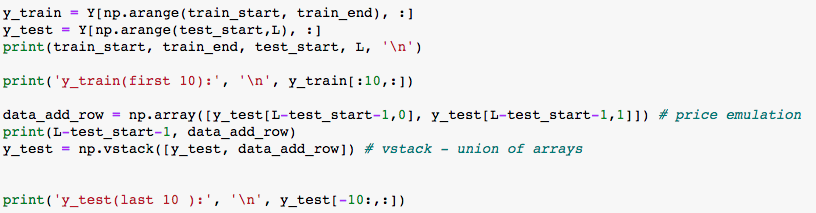

In [27]:
# Just run the cell !

y_train = Y[np.arange(train_start, train_end), :]
y_test = Y[np.arange(test_start,L), :]
print(train_start, train_end, test_start, L, '\n')

print('y_train(first 10):', '\n', y_train[:10,:])

data_add_row = np.array([y_test[L-test_start-1,0], y_test[L-test_start-1,1]])  # price emulation
print(L-test_start-1, data_add_row)
y_test = np.vstack([y_test, data_add_row]) # vstack - union of arrays


print('y_test(last 10 ):', '\n', y_test[-10:,:])

0 220000 220001 249950 

y_train(first 10): 
 [[0.3939394  0.45454547]
 [0.3939394  0.45454547]
 [0.3939394  0.4848485 ]
 [0.45454547 0.4848485 ]
 [0.5151515  0.54545456]
 [0.5151515  0.6060606 ]
 [0.54545456 0.6666667 ]
 [0.54545456 0.6666667 ]
 [0.6363636  0.6666667 ]
 [0.6363636  0.6969697 ]]
29948 [0.46575344 0.5068493 ]
y_test(last 10 ): 
 [[0.53424656 0.5890411 ]
 [0.53424656 0.5890411 ]
 [0.53424656 0.5890411 ]
 [0.5479452  0.60273975]
 [0.53424656 0.5753425 ]
 [0.46575344 0.53424656]
 [0.46575344 0.5068493 ]
 [0.47945204 0.5068493 ]
 [0.46575344 0.5068493 ]
 [0.46575344 0.5068493 ]]


0 220000 220001 249950 

y_train(first 10): 
 [[0.3939394  0.45454547]
 [0.3939394  0.45454547]
 [0.3939394  0.4848485 ]
 [0.45454547 0.4848485 ]
 [0.5151515  0.54545456]
 [0.5151515  0.6060606 ]
 [0.54545456 0.6666667 ]
 [0.54545456 0.6666667 ]
 [0.6363636  0.6666667 ]
 [0.6363636  0.6969697 ]]
29948 [0.46575344 0.5068493 ]
y_test(last 10 ): 
 [[0.53424656 0.5890411 ]
 [0.53424656 0.5890411 ]
 [0.53424656 0.5890411 ]
 [0.5479452  0.60273975]
 [0.53424656 0.5753425 ]
 [0.46575344 0.53424656]
 [0.46575344 0.5068493 ]
 [0.47945204 0.5068493 ]
 [0.46575344 0.5068493 ]
 [0.46575344 0.5068493 ]]


#### Final control

26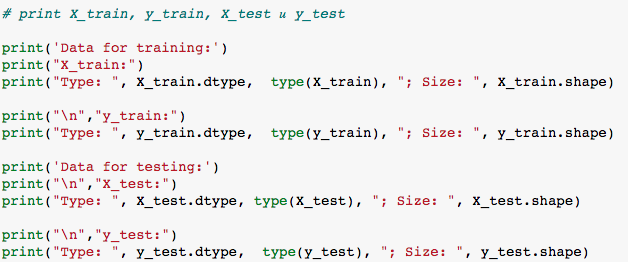

In [28]:
# Just run the cell !

# print X_train, y_train, X_test и y_test

print('Data for training:')
print("X_train:")
print("Type: ", X_train.dtype,  type(X_train), "; Size: ", X_train.shape)

print("\n","y_train:")
print("Type: ", y_train.dtype,  type(y_train), "; Size: ", y_train.shape)

print('Data for testing:')
print("\n","X_test:")
print("Type: ", X_test.dtype, type(X_test), "; Size: ", X_test.shape)

print("\n","y_test:")
print("Type: ", y_test.dtype,  type(y_test), "; Size: ", y_test.shape)

Data for training:
X_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (220000, 50, 5)

 y_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (220000, 2)
Data for testing:

 X_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (29950, 50, 5)

 y_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (29950, 2)


Data for training:
X_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (220000, 50, 5)

 y_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (220000, 2)
Data for testing:

 X_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (29950, 50, 5)

 y_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (29950, 2)


### Convolutional Neural Network

#### Create CNN

27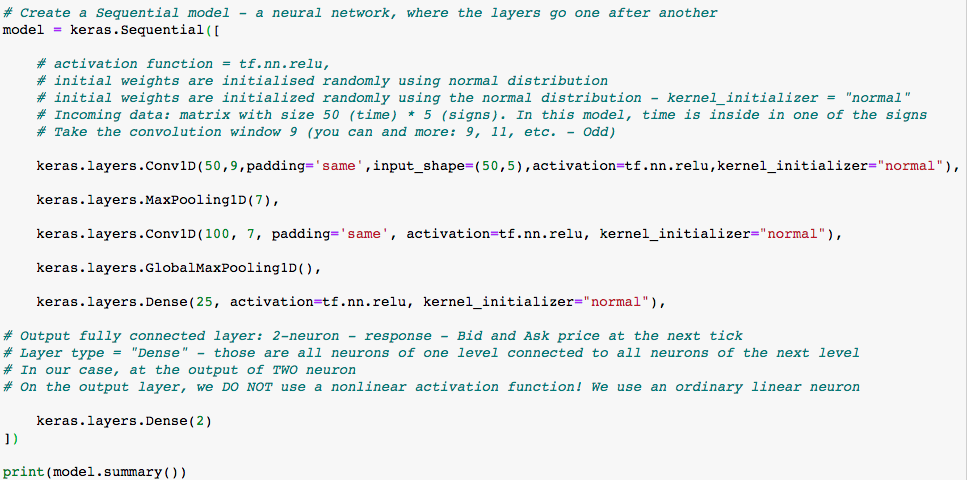

In [29]:
model = keras.Sequential([
    keras.layers.Conv1D(50,9,padding='same',input_shape=(50,5),activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100,7,padding='same',activation=tf.nn.relu,kernel_initializer='normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25, activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.Dense(2)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 50)            2300      
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 50)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 100)            35100     
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 2)                 5

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 50)            2300      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 50)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 100)            35100     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 2)                 5

#### Callbacks

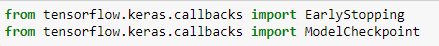

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

In [32]:
mc = ModelCheckpoint('best_model_CNN_EURO-USD.h5', monitor='val_loss',model='min', verbose=1, save_best_only=True)

### Model compilation

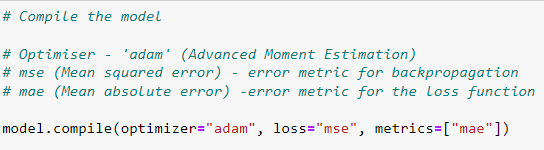

In [33]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

### Trainig CNN

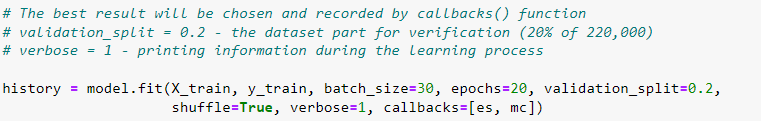

In [37]:
history = model.fit(X_train, y_train, batch_size=30, epochs=10, validation_split=0.2, shuffle=True, verbose=1, callbacks=[es, mc])


Epoch 1/10
5850/5867 [============================>.] - ETA: 0s - loss: 6.9900e-04 - mae: 0.0177
Epoch 1: val_loss improved from inf to 0.00086, saving model to best_model_CNN_EURO-USD.h5
5867/5867 [==============================] - 13s 2ms/step - loss: 6.9876e-04 - mae: 0.0177 - val_loss: 8.5820e-04 - val_mae: 0.0193
Epoch 2/10
  67/5867 [..............................] - ETA: 13s - loss: 6.7478e-04 - mae: 0.0180

/home/atabekdemurtaza/Documents/ARU Course/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5865/5867 [============================>.] - ETA: 0s - loss: 6.9815e-04 - mae: 0.0177
Epoch 2: val_loss improved from 0.00086 to 0.00083, saving model to best_model_CNN_EURO-USD.h5
5867/5867 [==============================] - 15s 2ms/step - loss: 6.9819e-04 - mae: 0.0177 - val_loss: 8.3371e-04 - val_mae: 0.0186
Epoch 3/10
5847/5867 [============================>.] - ETA: 0s - loss: 6.9871e-04 - mae: 0.0177
Epoch 3: val_loss did not improve from 0.00083
5867/5867 [==============================] - 15s 3ms/step - loss: 6.9867e-04 - mae: 0.0177 - val_loss: 8.4307e-04 - val_mae: 0.0189
Epoch 4/10
5856/5867 [============================>.] - ETA: 0s - loss: 6.9499e-04 - mae: 0.0176
Epoch 4: val_loss improved from 0.00083 to 0.00083, saving model to best_model_CNN_EURO-USD.h5
5867/5867 [==============================] - 15s 3ms/step - loss: 6.9477e-04 - mae: 0.0176 - val_loss: 8.2789e-04 - val_mae: 0.0187
Epoch 5/10
5862/5867 [============================>.] - ETA: 0s - loss: 6.9836e-04 - ma

Epoch 1/20
5867/5867 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0234
Epoch 1: val_loss improved from inf to 0.00102, saving model to best_model_CNN_EURO-USD.h5
5867/5867 [==============================] - 24s 4ms/step - loss: 0.0014 - mae: 0.0234 - val_loss: 0.0010 - val_mae: 0.0223
Epoch 2/20
5858/5867 [============================>.] - ETA: 0s - loss: 7.5110e-04 - mae: 0.0188
Epoch 2: val_loss improved from 0.00102 to 0.00086, saving model to best_model_CNN_EURO-USD.h5
5867/5867 [==============================] - 19s 3ms/step - loss: 7.5099e-04 - mae: 0.0188 - val_loss: 8.5855e-04 - val_mae: 0.0192
Epoch 3/20
5853/5867 [============================>.] - ETA: 0s - loss: 7.3569e-04 - mae: 0.0185
Epoch 3: val_loss did not improve from 0.00086
5867/5867 [==============================] - 19s 3ms/step - loss: 7.3642e-04 - mae: 0.0185 - val_loss: 0.0010 - val_mae: 0.0228
Epoch 4/20
5854/5867 [============================>.] - ETA: 0s - loss: 7.2420e-04 - mae: 0.0182

#### load the saved model

In [34]:
model = keras.models.load_model('best_model_CNN_EURO-USD.h5')

### Evaluation

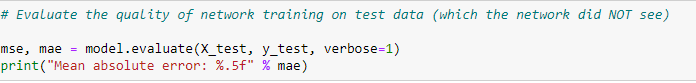

In [35]:
mse, mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean absolute error: {mae}')

936/936 [==============================] - 1s 1ms/step - loss: 0.0014 - mae: 0.0247
Mean absolute error: 0.024681761860847473


936/936 [==============================] - 2s 2ms/step - loss: 0.0013 - mae: 0.0246
Mean absolute error: 0.02457


### Mean Absolute Error (MAE)  graphs during training

34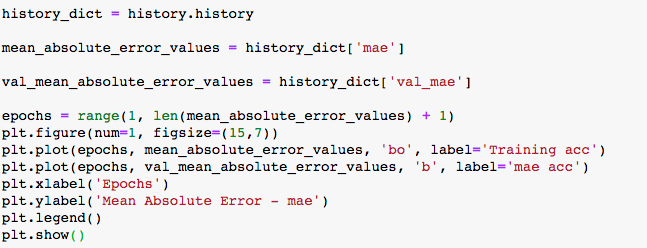

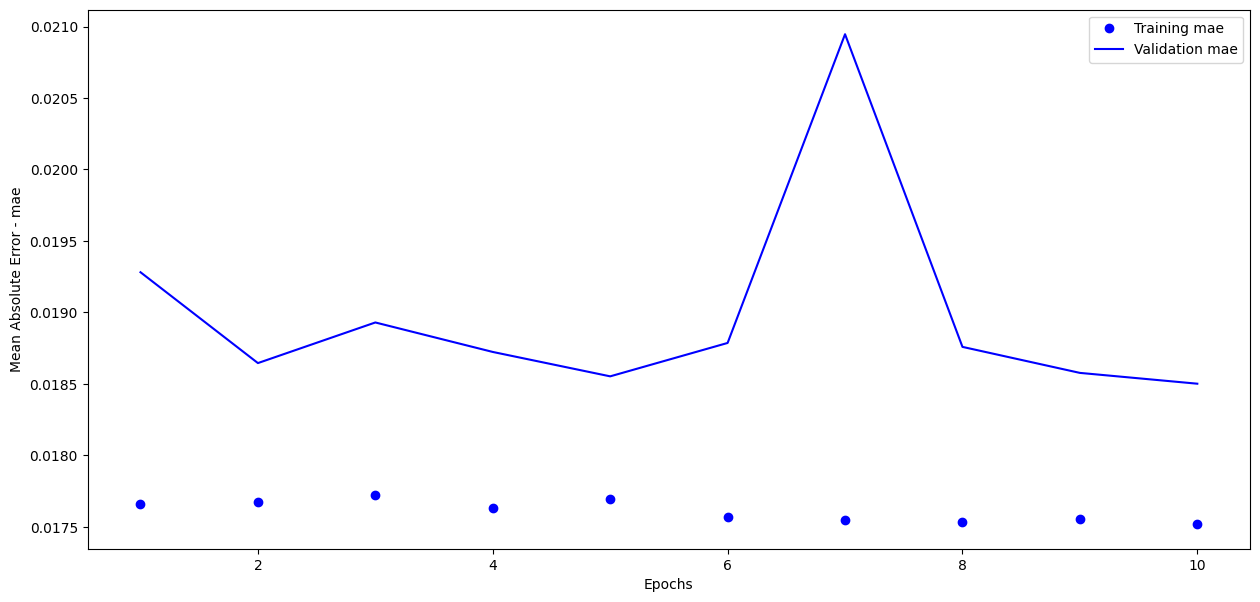

In [38]:
# Just run the cell !

history_dict = history.history

mean_absolute_error_values = history_dict['mae']

val_mean_absolute_error_values = history_dict['val_mae']

epochs = range(1, len(mean_absolute_error_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mae')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

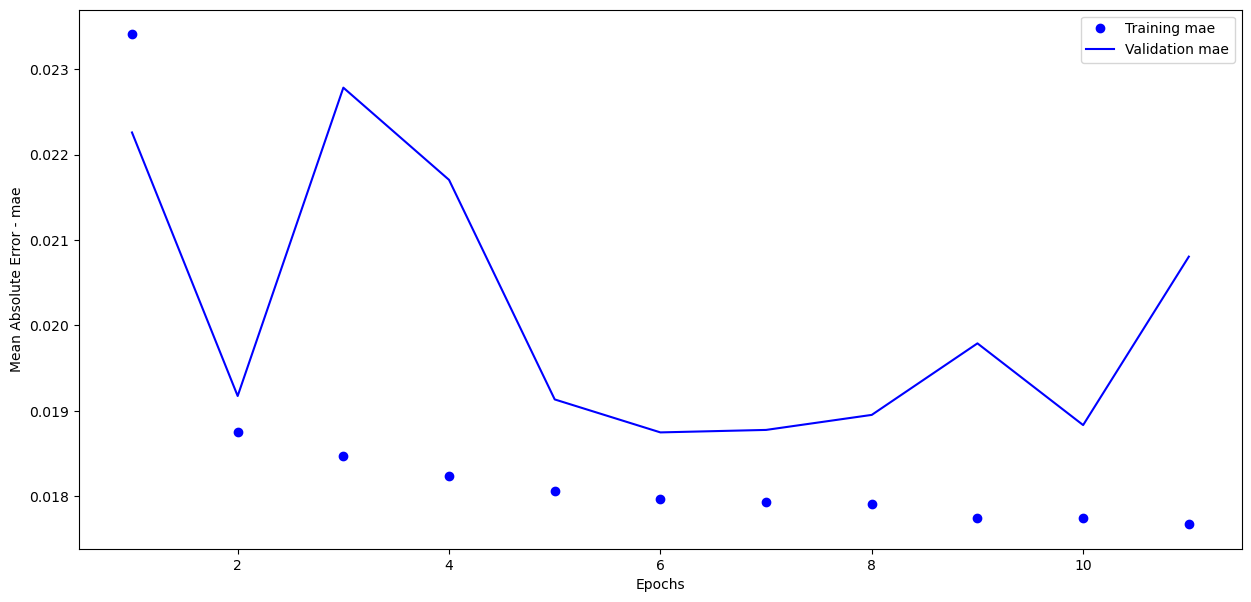

### Price Chart

35

In [39]:
pred = model.predict(X_test)

936/936 [==============================] - 4s 4ms/step


936/936 [==============================] - 1s 1ms/step


36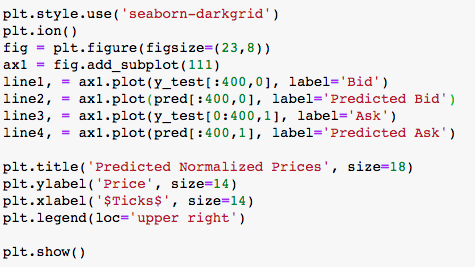

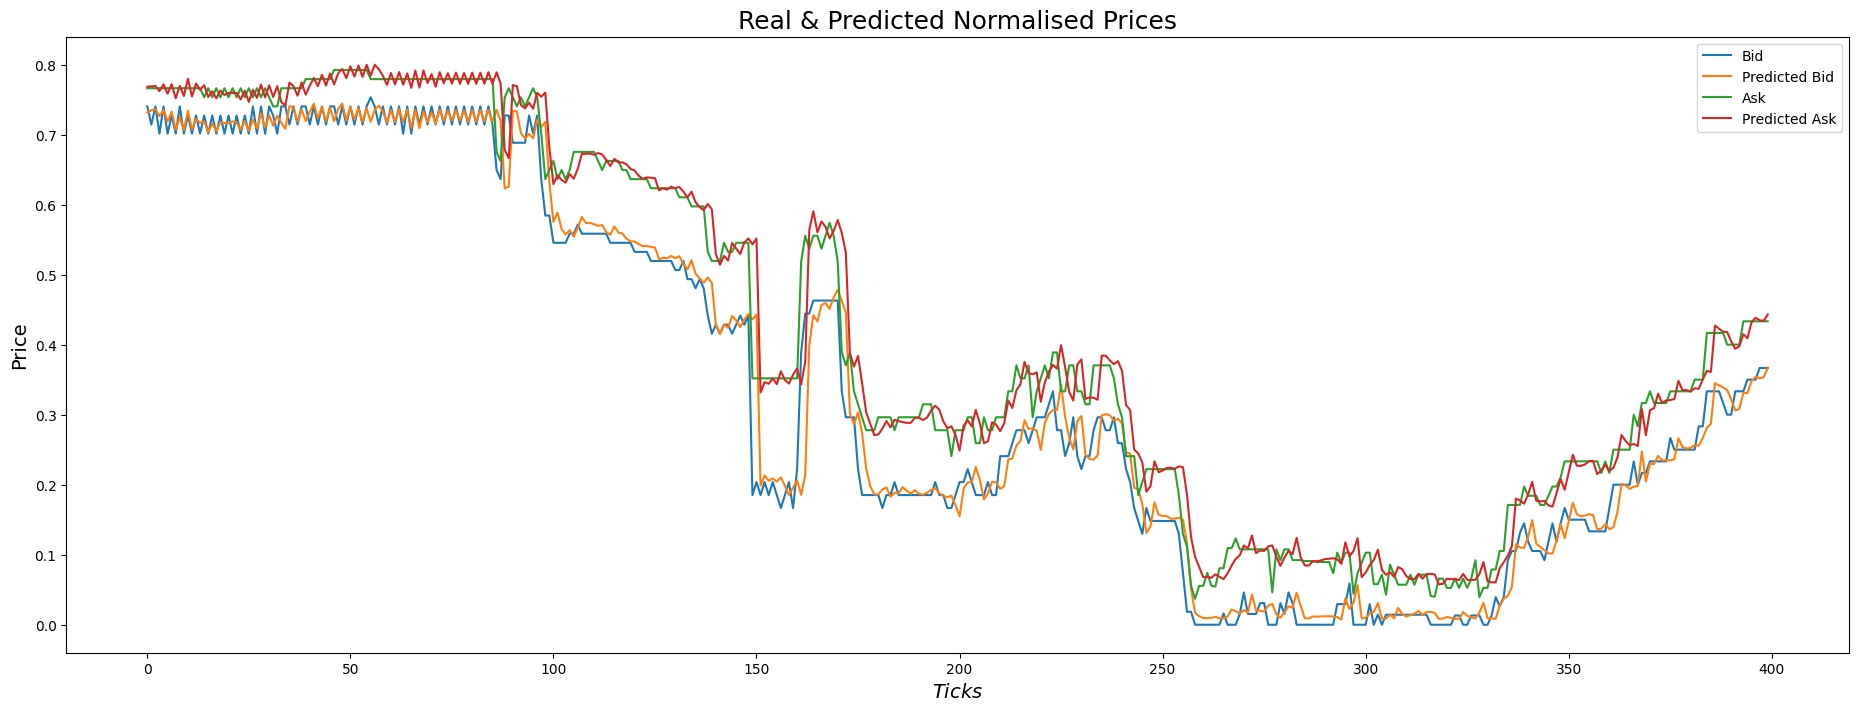

In [40]:
# Just run the cell !

# plt.style.use('seaborn-darkgrid') 
plt.ion()
fig = plt.figure(figsize=(23,8))  
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[:400,0], label='Bid')
line2, = ax1.plot(pred[:400,0], label='Predicted Bid')
line3, = ax1.plot(y_test[0:400,1], label='Ask')
line4, = ax1.plot(pred[:400,1], label='Predicted Ask')

plt.title('Real & Predicted Normalised Prices', size=18)
plt.ylabel('Price', size=14)
plt.xlabel('$Ticks$', size=14)
plt.legend(loc='upper right') 

plt.show()

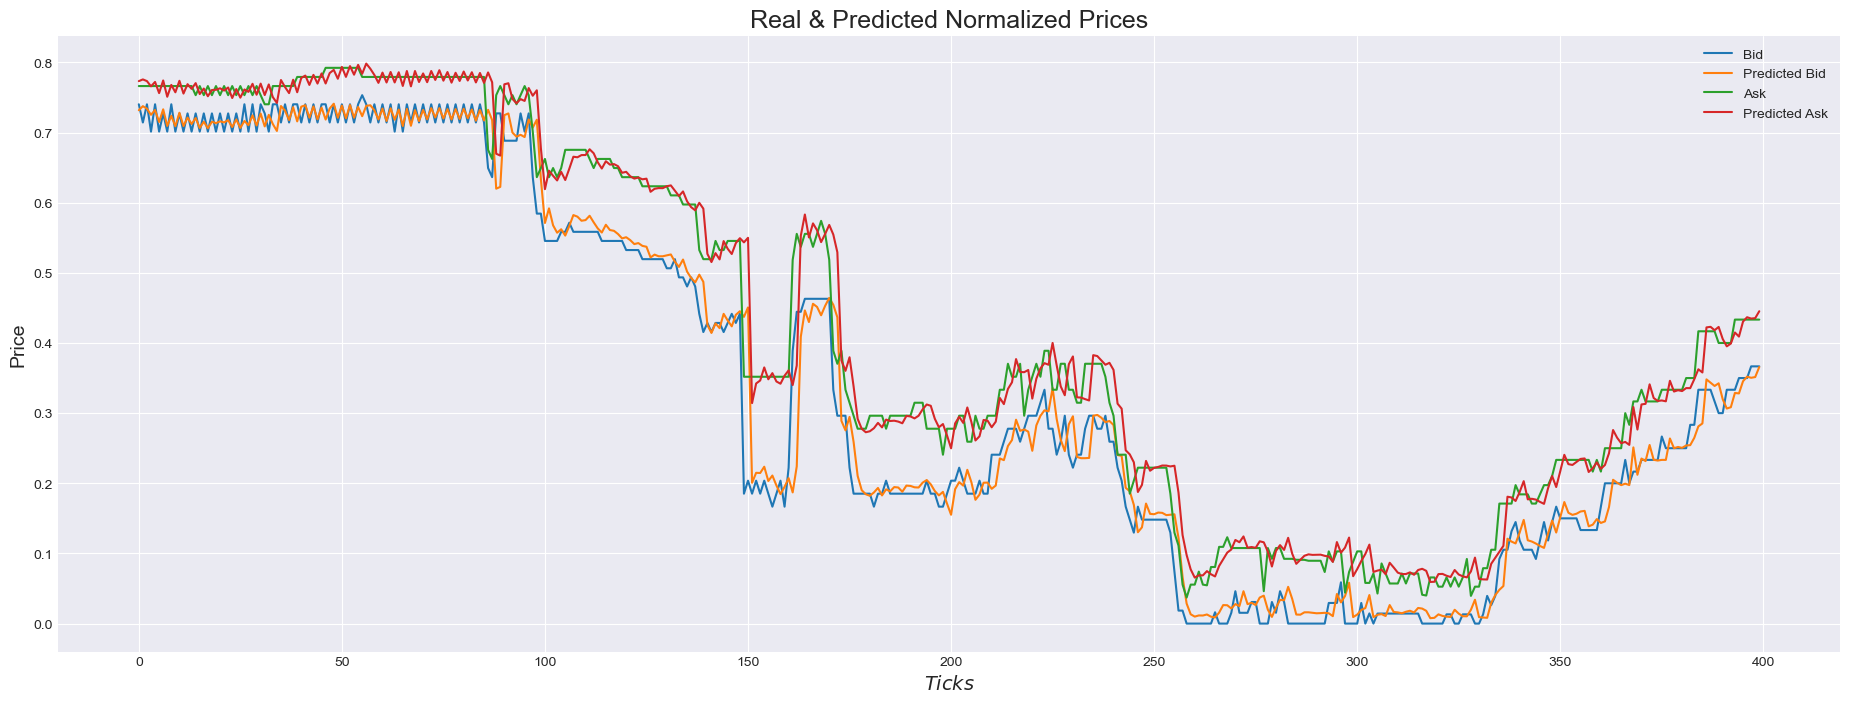

### Normalised Detailed Chart

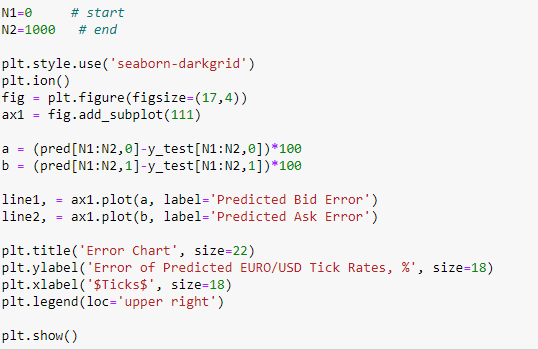

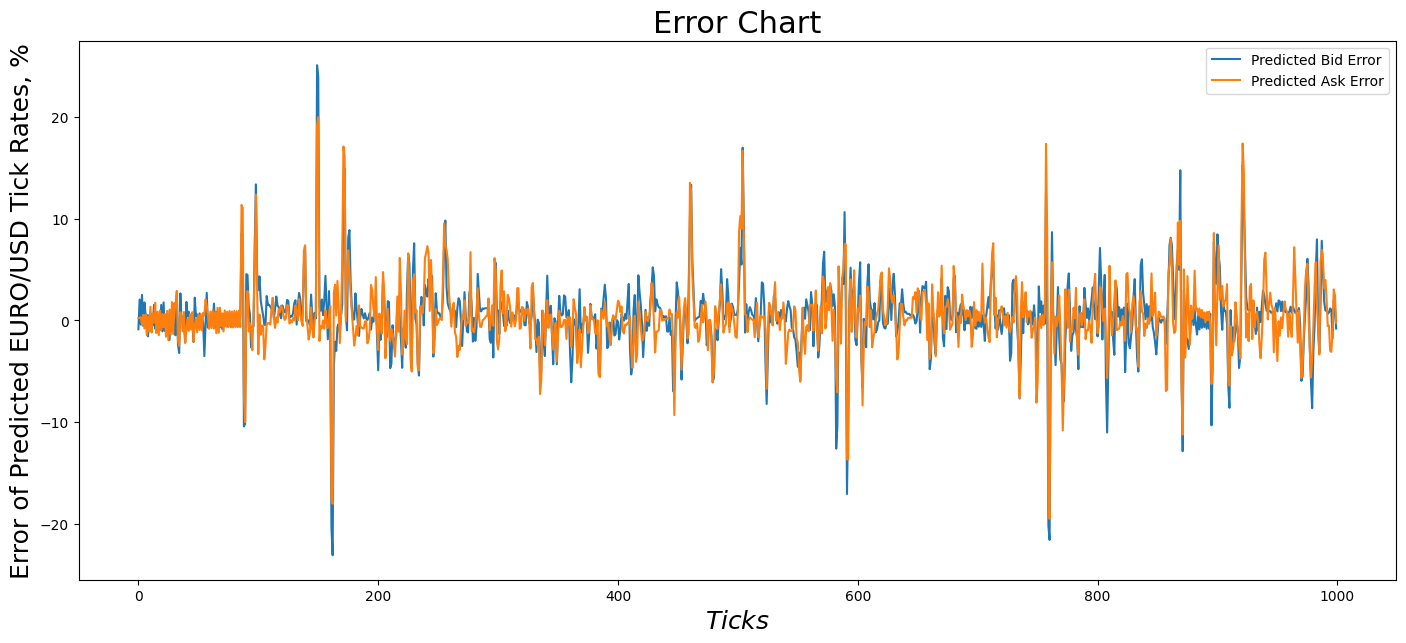

In [42]:
N1 = 0     # start
N2 = 1000   # end

plt.ion()
fig = plt.figure(figsize=(17, 7))  # Specify both width and height
ax1 = fig.add_subplot(111)

a = (pred[N1:N2, 0] - y_test[N1:N2, 0]) * 100
b = (pred[N1:N2, 1] - y_test[N1:N2, 1]) * 100

line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted EURO/USD Tick Rates, %', size=18)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right')

plt.show()


In [49]:
# ! explain the results by writing a few sentences